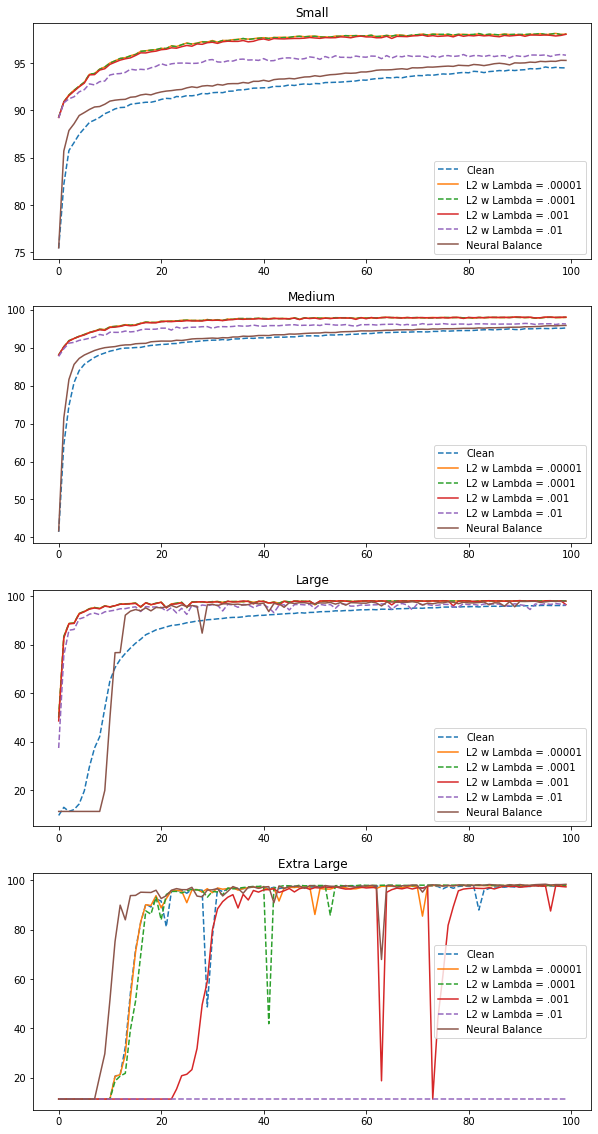

In [6]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

vals = []

for size in ['small', 'Medium', 'Large', 'XLarge']:
    l = []
    for type in ['Clean', 'L21e-5', 'L21e-4', 'L21e-3','L21e-2', 'NB']:
        with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/hist/{size}MnistModel{type}Hist.pkl', 'rb') as file:
            l.append(pickle.load(file)['test_acc'])
    vals.append(l)

x_values = list(range(100))

fig, axs = plt.subplots(4, figsize = (10, 20))

for i in range(4):
    for j in range(6):
        if j == 0:
            axs[i].plot(x_values, vals[i][j], label="Clean", linestyle='--')
        elif j == 1:
            axs[i].plot(x_values, vals[i][j], label="L2 w Lambda = .00001")
        elif j == 2:
            axs[i].plot(x_values, vals[i][j], label="L2 w Lambda = .0001", linestyle='--')
        elif j == 3:
            axs[i].plot(x_values, vals[i][j], label="L2 w Lambda = .001")
        elif j == 4:
            axs[i].plot(x_values, vals[i][j], label="L2 w Lambda = .01", linestyle='--')
        elif j == 5:
            axs[i].plot(x_values, vals[i][j], label="Neural Balance")
    if i == 0:
        axs[i].set_title("Small")
    elif i == 1:
        axs[i].set_title("Medium")   
    elif i == 2:
        axs[i].set_title("Large")
    elif i == 3:
        axs[i].set_title("Extra Large")
    axs[i].legend()

plt.savefig("plots.png", dpi=1000)

In [16]:
from tabulate import tabulate

for size in ['small', 'Medium', 'Large', 'XLarge']:
    print("{:>15}".format(size))
    for type in ['Clean', 'L21e-5', 'L21e-4', 'L21e-3','L21e-2', 'NB']:
        with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/hist/{size}MnistModel{type}Hist.pkl', 'rb') as file:
            t = type
            m = np.max(pickle.load(file)['test_acc'])
            ft = "{:<15}".format(t)
            fm = "{:<15}".format(m)
            print(ft, fm)
    print()

          small
Clean           94.58          
L21e-5          98.12          
L21e-4          98.13          
L21e-3          98.03          
L21e-2          95.9           
NB              95.28          

         Medium
Clean           95.22          
L21e-5          98.05          
L21e-4          98.04          
L21e-3          98.12          
L21e-2          96.42          
NB              95.88          

          Large
Clean           96.15          
L21e-5          97.98          
L21e-4          98.04          
L21e-3          98.1           
L21e-2          96.92          
NB              97.85          

         XLarge
Clean           97.91          
L21e-5          97.98          
L21e-4          98.12          
L21e-3          97.87          
L21e-2          11.35          
NB              98.45          

